In [1]:
from __future__ import division, print_function

import netCDF4 as nc
import numpy as np

from scipy.interpolate import griddata

import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from mpl_toolkits import basemap
import warnings
from exceptions import KeyError
from netCDF4 import Dataset
%matplotlib inline

In [2]:
basin_mask = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA2_basin_mask.nc')
mesh_mask = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA2_mesh_mask.nc')

In [3]:
lon2 = mesh_mask.variables['nav_lon'][:]
lat2 = mesh_mask.variables['nav_lon'][:]

In [4]:
lon2.shape

(400, 272)

In [5]:
mask = basin_mask.variables['tmask'][:,:]

In [6]:
mesh4 = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask4 = mesh4.variables['tmask'][0]
lon4 = mesh4.variables['nav_lon'][:]
lat4 = mesh4.variables['nav_lon'][:]

#coordfile = nc.Dataset('/home/jacquielee/data/ANHA4_coordinates.nc')

In [7]:
#coordfile.variables
# lat21D = lat2[0]
# lon21D = lon2[:,0]
# lat41D = lat4[0]
# lon41D = lon4[:,0]
# print(lat41D)

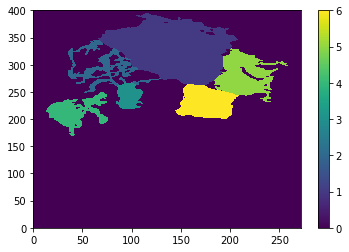

In [8]:
mesh = plt.pcolor(mask)
plt.colorbar(mesh)

In [10]:
#interpolate (with nearest neighbor method) basin mask from ANHA2 grid to ANHA4 grid
#.flipud(lat)
#from mpl_toolkits import basemap
#ANHA4mask = basemap.interp(np.flipud(mask),lon2,np.flipud(lat2),lon4,np.flipud(lat4),masked=0 ,order=0)

In [11]:
newgrid = np.zeros((800,544))
for i in range(0,400):
    for j in range(0,272):
        value = mask[i,j]
        newgrid[i*2,j*2] = value
        newgrid[i*2,j*2+1] = value
        newgrid[i*2+1,j*2] = value
        newgrid[i*2+1,j*2+1] = value

In [13]:
#grid.shape

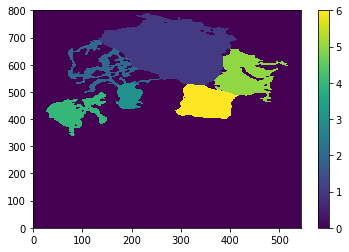

In [76]:
mesh = plt.pcolor(newgrid)
plt.colorbar(mesh)

In [77]:
from netCDF4 import Dataset

nrows = 800
ncols = 544

netfile = Dataset('/mnt/storage0/jacquielee/research/data/ANHA4_basin_mask.nc', 'w', format='NETCDF3_64BIT')

In [78]:
netfile.createDimension('x', nrows)
netfile.createDimension('y', ncols)

<type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 544

In [79]:
ANHA4_basin  = netfile.createVariable('tmask', 'f8', ('x', 'y'))

In [80]:
ANHA4_basin[:,:] = newgrid
netfile.close()